# Danish Khan
### Term Project
### DSC 550 Data Mining
### 1/10/2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
from matplotlib import ticker
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

# Project Milestone 1

### Narrative

One of the most unpredictable industries of our modern economy is the housing industry. Over the last several years, the housing industry has been valued at a range of prices that are far too wide to accurately predict for buyers and real estate agencies. The business problem of inaccurately predicting housing prices based on key factors by real estate agencies, can hinder quick sales and accurate property valuation. To solve this business problem, data analysis and modeling can be performed on factual historical sales data to accurately predict a home’s monetary price value as a target. The industry has established that location is the number one factor when determining a home’s value. To eliminate this bias, I’ve chose to analyze a focused location, which is my local residential area of King County in Washington State, USA. I will use the variety of values in my dataset, consisting of categories like lot size, home size, number of bathrooms, number of bedrooms, floors, view type, basement size, building grade quality, etc. The dataframe I have selected has home sales information that is compiled from May 2014 to May 2015, made up of all homes sold in my local county. To find a solution for this business problem, I will have to prepare the dataset to select for variables that would allow for the building of a potential predictive model. Since the target of the modeling will be price, which is a numerical value, the data used to model with will also be kept to numeric values.

### Dataframe

Data Source: Kaggle https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [2]:
# importing original data and converting to dataframe

df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
# checking if all data is numeric and not string for graphing

df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Graphical Analysis

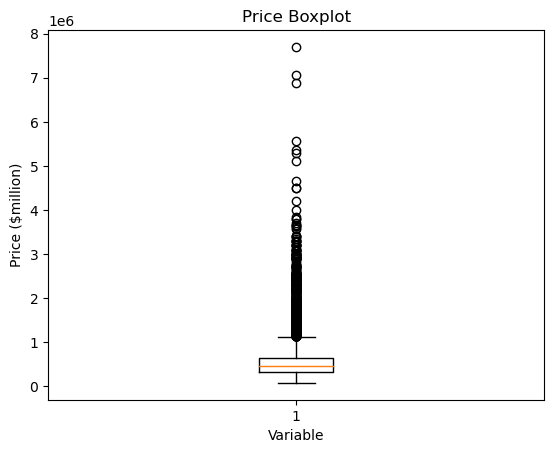

In [4]:
# visualizing price distribution with a boxplot

mpl.boxplot(df.price)
mpl.title("Price Boxplot")
mpl.xlabel("Variable")
mpl.ylabel("Price ($million)")
mpl.show()

This graph visually tells me what the rough range of pricing prediction the business model can accurately make. Based on the quartile sections I can determine that a majority of the home prices without extreme outliers is roughly 300k to 700k. There are still quite a few outliers in terms of housing price beyond the data range of 1.1million.

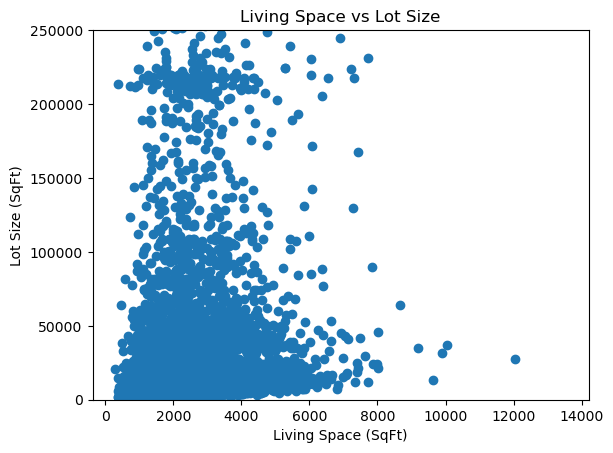

In [5]:
# visualizing the size of living space and lot size with a scatterplot

mpl.scatter(df.sqft_living, df.sqft_lot)
mpl.ylim(0, 250000)
mpl.title("Living Space vs Lot Size")
mpl.xlabel("Living Space (SqFt)")
mpl.ylabel("Lot Size (SqFt)")
mpl.ticklabel_format(style='plain')
mpl.show()

This graph helps me to understand the relationship between living space and lot space, while showing me the range of home and lot sizes present in the data. I was expecting a much more linear relationship between the two variables, but this is just not the case. Even after setting an axis range limit for lot size to disregard extreme outliers, there is still far too much grouping of the data to conclude any relationship between the two variables. In a positive sense, this shows that the variables can independently be used to predict house prices, and that there is no strong background correlation that can influence the model when both variables are used at the same time for predictive pricing.

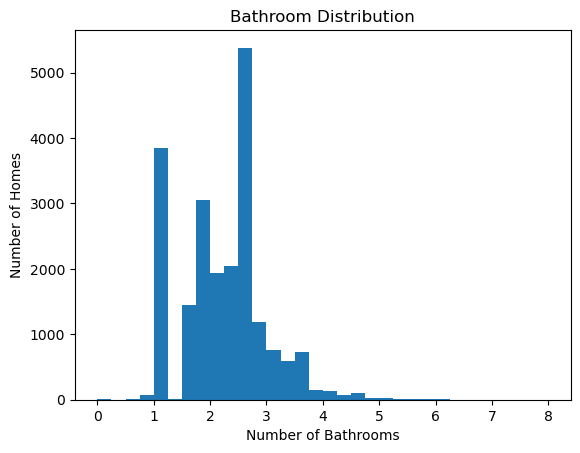

In [6]:
# visualizing the distribution of number of bathroom types across all homes with a histogram

mpl.hist(df.bathrooms, bins=32)
mpl.title("Bathroom Distribution")
mpl.xlabel("Number of Bathrooms")
mpl.ylabel("Number of Homes")
mpl.show()

This graph shows me the number of bathrooms across all homes in the dataset, but as a distribution. The definition of bathrooms in the world of real estate is a little different. They use decimals to indicate bathroom parameters such as 0.5 means there's an added shower. It's only appropraite when visualizing this variable that it's treated as categorical to understand distribution. Here I can see that bathroom sizes are coded mostly between 1 and 3 in a strong majority of the homes. For modeling because the range is so small, I can treat it as a numeric variable to feed into the model for a predictive output. If the range was far too great, I would've converted this column to a categorical binary variable through forming dummy variable columns in the dataset. This will forutnately not be case, but I had to double check with a histogram while treating the variable as categorical first.

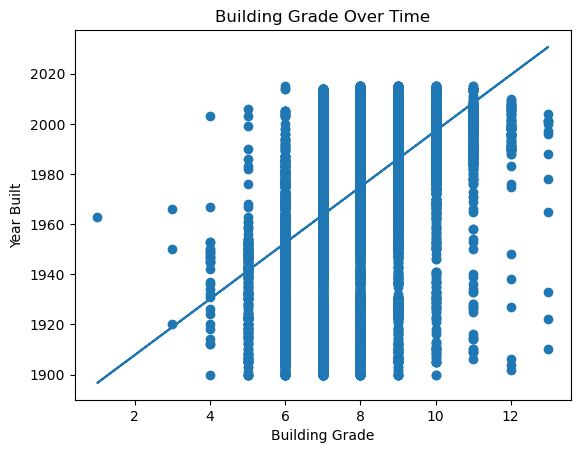

In [7]:
# visualizing how year of home built may afect building quality rating wtih a scatterplot and a line of fit

x = df.grade
y = df.yr_built
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

mpl.scatter(x, y)
mpl.plot(x, p(x))
mpl.title("Building Grade Over Time")
mpl.xlabel("Building Grade")
mpl.ylabel("Year Built")
mpl.show()

This graph tells me the possible trend of whether or not the year a home was built affects the official quality grade assigned, based on state contruction standards. One of the key aspects of a home's value is the year it was built, and natural reasoning would suggest that the newer a home is, the better built it will be. Originally the scatterplot barely suggested this visually, but to make sure I'm making the correct conclusion, I added a polynomial line of fit with 1 degree to act as a linear line of fit. The slope is visually positive which indicates a positive relationship between the two variables.

### Overview

From the graphical analysis, I've been able to both understand the range and types of homes present in the dataset and which variables are interrelated or truly independent This is important to consider when modeling, as some variables can have an additive effect when used to predict a home's price. From the price range in the dataset I can expect an accurate predictive output between 100k and 1.1million with a majority of the prices between 300k to 700k. Bathrooms can be treated as a numerical variable rather than a categorical variable, thanks to the narrow distribution range present in my data set. It also seems that lot size and living size can be treated as individual variables rather than ones with a positive correlation between them. This is unexpected, but in a way a good thing because either living size or lot size can be used to help determine a home's value, rather than forced to be used together as most people would assume. When comparing a home's building grade and the year built, this puts perspective on whether or not it's important to consider the year a house is built given how frequently places can be renovated. I was able to determine a positive correlation between the two using a line of fit, but visually most homes reside between the grades of 6 and 10 irrespective of the year built.

# Project Milestone 2

### Data Preparation

In [8]:
# keeping only columns of interest

df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade',
         'sqft_basement', 'yr_built', 'yr_renovated']]
df.shape

(21613, 12)

This step is for removing dataframe columns I decided I do not need, and believe aren't necessary for the model. I dropped the "ID" column since a unique identifier to a sales transaction adds nothing to the model. The "date" column was dropped since I chose a narrow enough timeframe of housing sales to avoid taking into account inflation or seasonal fluctuations. I also dropped the "view" column since it only refers to how many spots in the house from which an open view of the landscape can be observed. I already have a waterfront variable as binary information, which has a significanly larger influence over housing price compared to any other natural view. I removed "sqft_above" since this variable refers to living space above a home's basement. A strong majority of the homes do not have a a basement so this value becomes a duplicate with the "sqft_living" variable. As a result, I later converted the "sqft_basement" variable to binary to compensate for dropping the "sqft_above" variable. Furthermore, I also removed the "zipcode", "lat", and "long" variables. Zipcode is actually a categorical variable and lattitude and longtitude don't really help too much in this scenario. Since where I live the county is smaller and the city boundaries are extremely small. For instance, my own city is only 17 square miles large, most of which is without housing areas. Finally, I also removed the columns "sqft_living15" and "sqft_lot15" since these are updated values as of the final year of the dataset. These are unnecessary because most of the values are duplicates compared to the "sqft_living" and "sqft_lot" variables I'm already using.

In [9]:
# checking for any NaN values and removing entire row

df.dropna(how='any')
df.shape

(21613, 12)

This step is for dealing with NaN or missing values, but in a unique way. I ran a search for any NaN values, and if any are found then I asked to delete the entire row. My thought behind this is I want a clean, natural dataset with each row containing a complete set of variables without the need of using median nor mean values from other rows. Houses can have strong differences between each other, and simply using median or mean values to fill NaN values could strongly misrepresent the housing price listed. There were no missing values in the dataset since the dataframe dimensions remained the same after running the search.

In [10]:
# checking for any duplicate rows and removing all

df.drop_duplicates(inplace=True)
df.shape

(21605, 12)

This step is for identifying and deleting any duplicate rows in the dataframe. I specifically searched for any duplicate rows and dropped them after first dropping the ID column, since there are no duplicate sales transaction identifications anyway. My goal here was to eliminate the same house that has been sold multiple times in the short period of time, since having the same set of parameters with multiple prices would affect the overall target variable of price in the model. I believe it's best not to have the same set of independent variable values match different dependent variable values. There were only a few such scenarios that led to duplicate rows, since the dataframe dimensions reduced by a handful of rows.

In [11]:
# removing all rows that have data outside standard deviation of 6 in any respective column, using z-score

z = np.abs(stats.zscore(df))
threshold = 6
df = df[(z < threshold).all(axis=1)]
df.shape

(21287, 12)

This step is for dealing with outliers using a methodical approach. I believe the question I'm trying to answer is primarily of use as a business strategy. As a result, I wanted to evluate the dataframe's data distribution and outliers from a business perspective. In my MBA I learned about the importance of six sigma in the world of manufacturing tolerance assessment. This is where greater than 99% of the represented data points should fall between an upper specificiation limit of plus 6 standard deviations and a lower specification limit of minus 6 standard deviations. Therefore, I applied a z-score filter of 6 standard deviations sorting through each column, and dropping the entire row where the data point in a specific column is beyond plus or minus 6 standard deviations. Filtering by a standard deviation approach is easier to statistically justify, rather than sorting through each column and subjectively assessing which values shouldn't be included. Also, the z-score threshold of 6 standard deviations was selected using a real-world business method so this value was also not randomly selected. Altogether, I believe this is a usable justification and method for approaching the outliers specific to my dataset and question. The dataframe demensions reduced by a couple hundred rows after removing the outliers using my approach.

In [12]:
# converting basement size and year renovated columns to a binary values

df['sqft_basement'].where(df['sqft_basement'] == 0, 1, inplace=True)
df['yr_renovated'].where(df['yr_renovated'] == 0, 1, inplace=True)

This step is for converting a couple of variables to binary. To avoid a strong majority of duplicate variable data, I had  earlier dropped the variable "sqft_above" as most homes do not have a basement. As a result, having size information of a basement was no longer as important since the size couldn't be readily compared to housing space above ground. Therefore, I converted this variable to binary to indicate if a house has a basement, to keep with data selection coherence. I also converted the "yr_renovated" variable to binary. Years in this case are categorical, so instead of creating countless dummy variables to compensate for the multitude of years, converting to a yes/no approach of a renovated home is far more applicable for my dataframe.

In [13]:
# renaming columns to better match their contents

df = df.rename({'sqft_living':'sqft_home'}, axis=1)
df = df.rename({'sqft_basement':'basement'}, axis=1)
df = df.rename({'yr_renovated':'renovated'}, axis=1)

This step is for renaming the column titles to better reflect what the variables now represent after cleaning and converting the data. This includes converting "sqft_living" to "sqft_home" to clarify definition, and the new variable titles "basement" and "renovated" represent their binary variable conditions.

### Final Dataframe

In [14]:
# dataframe prepared for modeling

df

,price,bedrooms,bathrooms,sqft_home,sqft_lot,floors,waterfront,condition,grade,basement,yr_built,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,0,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,1,1951,1
2,180000.0,2,1.00,770,10000,1.0,0,3,6,0,1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,3,8,0,2009,0
21609,400000.0,4,2.50,2310,5813,2.0,0,3,8,0,2014,0
21610,402101.0,2,0.75,1020,1350,2.0,0,3,7,0,2009,0
21611,400000.0,3,2.50,1600,2388,2.0,0,3,8,0,2004,0


# Project Milestone 3

In [15]:
# splitting the data set into training and testing sets

features = df.drop(['price'], axis=1)
target = df['price']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=42)

This step is for splitting the cleaned dataframe into train and test sets. I divided the data into 80% features (X) and 20% test (Y). I kept the random_state parameter set to 42, which is its default setting. The target variable is assigned as "price," since this is the predictive value. I assigned the rest of the dataframe, excluding the target variable "price," as the features variable.

### Ordinary Linear Regression

In [16]:
# fitting data sets to model

model1 = LinearRegression()
model1.fit(features_train, target_train)

LinearRegression()

In this step is for fitting an ordinary linear regression model on the training dataset, to use as a baseline model for building upon as necessary. The cleaned dataframe is purely numeric, with zero categorical variables. Therefore, I wanted to explore model options that were only regression and not classification.

In [17]:
# model accuracy

accuracy1 = model1.score(features_test, target_test)
print("Accuracy: {:.2f}%".format(accuracy1*100))
print("R-square:", model1.score(features_train, target_train))

Accuracy: 62.47%
R-square: 0.6309460409237986


This step is for assessing the model fit to the cleaned dataframe. The parameters to asses goodness of fit that I used was a simple accuracy score converted to a percentage, and the R-square coefficient. I chose the R-square value due to the presence of multiple independent variables in the dataframe. Correlation is usually a good statistical test to understand how the variance can affect the strength of the relationship between one independent variable and one dependent variable. R-squared can scale across multiple independent variables, and use them to explain the variance for a dependent variable in a regression model. According to the chosen metrics, the accuracy of the model is 62.47% with an R-square value of 0.631.

### Standard Scaler Preprocessing With Linear Regression

In [18]:
# standardscaler preprocessing
std_sca = StandardScaler()

# fitting and transforming the training set
std_sca_features_train = std_sca.fit_transform(features_train)
# only transforming the test set
std_sca_features_test = std_sca.transform(features_test)

Based on the previous step, linear regression looks to be a useable regression model that I can build upon. The accuracy and R-square values are a little low, so this step is to start exploring preprocessing methods that can be used to transform the split dataframe, in an effort to improve the model fit. Generally, machine learning algorithms can work better when all features are on a relatively similar scale with normal distribution. I applied the standardscaler preprocessing function to the features datasets, but only fit the training dataset. This function transforms the data so that the average value is 0 with an overall standard deviation of 1.

In [19]:
# fitting data sets to model

model2 = LinearRegression()
model2.fit(std_sca_features_train, target_train)

LinearRegression()

This step is for fitting the transformed standardscaler dataset to a basic linear regression model.

In [20]:
# model accuracy

accuracy2 = model2.score(std_sca_features_test, target_test)
print("Accuracy: {:.2f}%".format(accuracy2*100))
print("R-square:", model2.score(std_sca_features_train, target_train))

Accuracy: 62.47%
R-square: 0.6309460409237986


This step is for assessing the model fit to the standardscaler preprocessed dataset. The parameters to asses goodness of fit that I used, were the same as before. Here, the accuracy of the model is 62.47% with an R-square value of 0.631. The model still fits with the same original accuracy, with no measurable affects after preprocessing the dataset with the standardscaler function.

### Polynomial Preprocessing of Term Limit Degrees 2-4 With Linear Regression

The following steps are for exploring the polynomial preprocessing function. Even though using a regression model works best with a numeric dataframe, the resulting equation from fitting a linear regression model may not work the best with a numeric dataframe. Looking back at the graphs of individual independent variables, some variables do have a linear relationship, while other variables seem to form clusters within a scatterplot. There is a strong likelihood that there are significant non-linear relationships between the independent variables and the dependent variable. Therefore, for the next step it makes sense to add additional term limit degrees to simple linear regression, since a stright line of fit doesn't appear to be good enough. In the following steps, I explore preprocessing the dataframe using polynomal terms, set to a limit of 2, 3, or 4 degrees. Simple linear regression used before has a term limit of 1 degree only.

In [21]:
# polynomial preprocessing with degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)

# fitting and transforming the training set
poly_features_train_d2 = poly.fit_transform(features_train)
# only transforming the test set
poly_features_test_d2 = poly.transform(features_test)

# fitting data sets to model
model3_d2 = LinearRegression()
model3_d2.fit(poly_features_train_d2, target_train)

# model accuracy
accuracy3_d2 = model3_d2.score(poly_features_test_d2, target_test)
print("Accuracy: {:.2f}%".format(accuracy3_d2*100))
print("R-square:", model3_d2.score(poly_features_train_d2, target_train))

Accuracy: 66.81%
R-square: 0.67755055407022


Using a polynomial term limit of 2 degrees, the accuracy of the model is 66.81% with an R-square value of 0.678. The polynomial linear regression model fits noticeably more accurate when compared to a simple linear regression model.

In [22]:
# polynomial preprocessing with degree 3
poly = PolynomialFeatures(degree=3, include_bias=False)

# fitting and transforming the training set
poly_features_train_d3 = poly.fit_transform(features_train)
# only transforming the test set
poly_features_test_d3 = poly.transform(features_test)

# fitting data sets to model
model3_d3 = LinearRegression()
model3_d3.fit(poly_features_train_d3, target_train)

# model accuracy
accuracy3_d3 = model3_d3.score(poly_features_test_d3, target_test)
print("Accuracy: {:.2f}%".format(accuracy3_d3*100))
print("R-square:", model3_d3.score(poly_features_train_d3, target_train))

Accuracy: 66.06%
R-square: 0.6805588329948725


Using a polynomial term limit of 3 degrees, the accuracy of the model is 66.06% with an R-square value of 0.681. The polynomial linear regression model still fits noticeably more accurate when compared to a simple linear regression model, but noticeably less accurate than when using a polynomial term limit of 2 degrees. The R-square value has increased further.

In [23]:
# polynomial preprocessing with degree 4
poly = PolynomialFeatures(degree=4, include_bias=False)

# fitting and transforming the training set
poly_features_train_d4 = poly.fit_transform(features_train)
# only transforming the test set
poly_features_test_d4 = poly.transform(features_test)

# fitting data sets to model
model3_d4 = LinearRegression()
model3_d4.fit(poly_features_train_d4, target_train)

# model accuracy
accuracy3_d4 = model3_d4.score(poly_features_test_d4, target_test)
print("Accuracy: {:.2f}%".format(accuracy3_d4*100))
print("R-square:", model3_d4.score(poly_features_train_d4, target_train))

Accuracy: 65.36%
R-square: 0.6957106338367769


Using a polynomial term limit of 4 degrees, the accuracy of the model is 65.36% with an R-square value of 0.696. The polynomial linear regression model still fits noticeably more accurate when compared to a simple linear regression model, but noticeably less accurate than when using a polynomial term limit of 2 or 3 degrees. The R-square value has increased further still. There is now an observable trend between accuracy and R-square values, so I will stop term limit exploration at 4 degrees.

### Model Evaluation Summary

In [24]:
# comparing models

print("ORDINARY LINEAR REGRESSION")
print("Accuracy: {:.2f}%".format(accuracy1*100))
print("R-square:", model1.score(features_train, target_train))
print("\n")
print("LINEAR REGRESSION + STANDARDSCALER")
print("Accuracy: {:.2f}%".format(accuracy2*100))
print("R-square:", model2.score(std_sca_features_train, target_train))
print("\n")
print("LINEAR REGRESSION + POLYNOMIAL^2")
print("Accuracy: {:.2f}%".format(accuracy3_d2*100))
print("R-square:", model3_d2.score(poly_features_train_d2, target_train))
print("\n")
print("LINEAR REGRESSION + POLYNOMIAL^3")
print("Accuracy: {:.2f}%".format(accuracy3_d3*100))
print("R-square:", model3_d3.score(poly_features_train_d3, target_train))
print("\n")
print("LINEAR REGRESSION + POLYNOMIAL^4")
print("Accuracy: {:.2f}%".format(accuracy3_d4*100))
print("R-square:", model3_d4.score(poly_features_train_d4, target_train))

ORDINARY LINEAR REGRESSION
Accuracy: 62.47%
R-square: 0.6309460409237986


LINEAR REGRESSION + STANDARDSCALER
Accuracy: 62.47%
R-square: 0.6309460409237986


LINEAR REGRESSION + POLYNOMIAL^2
Accuracy: 66.81%
R-square: 0.67755055407022


LINEAR REGRESSION + POLYNOMIAL^3
Accuracy: 66.06%
R-square: 0.6805588329948725


LINEAR REGRESSION + POLYNOMIAL^4
Accuracy: 65.36%
R-square: 0.6957106338367769


This step is for placing all metrics side-by-side for each model, to allow for further trend evaluation.

### Overview

After going through the process of choosing a model selection path and evaluting metrics along the way, I have gained a few insights after completion. Right away, I noticed that the resulting model may not be the most accurate for predicting housing prices, if solely based upon the cleaned dataframe provided. I believe that the model itself is a useful tool; however, it's the data selection to train the model that has the potential to reduce its accuracy. There are far more factors that determine a home's sale price than what I have fed into the model. For example, location is the single greatest factor for pricing determination. The original latitude and longitude values are not feasible for my purposes, since they're not scalable nor linear variables. Again, this demonstrates shortfalls of the cleaned dataframe the model is based off of, and not necessarily shortfalls of the model itself. For the model, I initially kept with linear regression as a baseline to understand the accuracy potential of any regression model, as a classification model is not appropriate for my selected data set. Using linear regression, my accuracy was roughly 62% and had an R-squared value of 0.631. These are lower values than I was expecting, but a good representation for a place to start. I figured the data may be too variable despite a 6 standard deviation filter I applied earlier. I preprocess the data with a standardscaler function to ensure normal distribution, and a similar data scale across all indepdendent variables. This did not improve the accuracy nor the R-squared value of the subsequent model. Realizing that not all of my independent variables are linear, I chose to preprocess the data using polynomial terms. This allows the regression model to bend and try to fit multiple groups of data points. Since simple linear regression is of term limit degree 1, I tested linear regression with polynomial term limit degrees 2 through 4. Immediately with term limit degree 2, the model jumped in metrics resulting in an accuracy of roughly 67% and an R-squared value of 0.678. With term limit degrees 3 and 4, I noticed an interesting pattern. The model accuracy kept dropping and the R-squared value kept increasing. This suggests that with increasing polynomial term limit degrees, the model appears to be over-fitting the data, which is not a good thing. At these limits, the polynomial regression coefficients begin representing the data noise rather than the actual variable relationships. Hence, the model appeared to improve according to the increasing R-squared values, but actually degraded according to the decreasing accuracy score. Therefore, my model selection for my cleaned dataset is preprocessed polynomial linear regression with a term limit degree of 2.